<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="350" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


-   Extract information from a given web site 
-   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br> 


In [3]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [4]:
# Your code here
from bs4 import BeautifulSoup
import requests

Download the webpage at the url


In [5]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [6]:
#your code goes here
soup = BeautifulSoup(data, 'html.parser')

Scrape the `Language name`, `Created By` `annual average salary`and `Learning Difficulty`.


In [7]:
#your code goes here
table = soup.find('table')
language_name = []
created_by = []
average_salary = []
learning_difficulty = []

for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    language_name.append(cols[1].text)
    created_by.append(cols[2].text)
    average_salary.append(cols[3].text)
    learning_difficulty.append(cols[4].text)



Create a _dataframe_ for scrapped data


In [8]:
import pandas as pd

df = pd.DataFrame({
    'Language': language_name,
    'Created By': created_by,
    'Average Annual Salary': average_salary,
    'Learning Difficulty': learning_difficulty
})

print(df)

     Language                                 Created By  \
0      Python                           Guido van Rossum   
1        Java                              James Gosling   
2           R               Robert Gentleman, Ross Ihaka   
3  Javascript                                   Netscape   
4       Swift                                      Apple   
5         C++                          Bjarne Stroustrup   
6          C#                                  Microsoft   
7         PHP                             Rasmus Lerdorf   
8         SQL    Donald D. Chamberlin, Raymond F. Boyce.   
9          Go  Robert Griesemer, Ken Thompson, Rob Pike.   

  Average Annual Salary Learning Difficulty  
0              $114,383                Easy  
1              $101,013                Easy  
2               $92,037                Hard  
3              $110,981                Easy  
4              $130,801                Easy  
5              $113,865                Hard  
6               $

Save the scrapped data into a file named _popular-languages.csv_


In [9]:
# your code goes here
df.to_csv('popular-languages.csv', index=False)

<Figure size 1000x600 with 0 Axes>

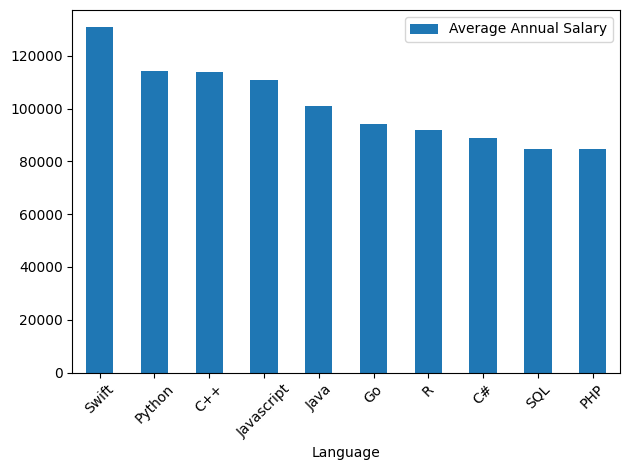

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('popular-languages.csv')
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$', '').str.replace(',', '').astype(float)

df_sorted = df.sort_values('Average Annual Salary', ascending=False)

plt.figure(figsize=(10, 6))
df_sorted.plot(kind='bar', x='Language', y='Average Annual Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
